<h1>
    Thermodynamics of Materials AD19: <br>
    <b>Class Activity 02</b>
</h1>

<table width="75%" align="center">
    <tr>
        <th align="left" colspan="2">
            <h2><b>Team<b>:</b></h2>
        </th>
    </tr>
    <tr>
        <td><h3>Antonio Osamu Katagiri Tanaka</h3></td>
        <td><h4>A01212611@itesm.mx</h4></td>
    </tr>
    <tr>
        <td><h3>Angel Manuel Villalba Rodríguez</h3></td>
        <td><h4>A00828035@itesm.mx</h4></td>
    </tr>
</table>

<h2>Leharne, S. (2017). <b>The physical chemistry of high-sensitivity differential scanning calorimetry of biopolymers.</b> ChemTexts, 3(1), 1–12. https://doi.org/10.1007/s40828-016-0038-0</h2>

---

<h1>Figure 11.</h1>

In [11]:
# PYTHON LIBRARIES
%matplotlib inline

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

from scipy import special, optimize

# DATA FIG 11
data_df = pd.read_csv("./fig11_data.txt", delimiter=",");
data_df = data_df.sort_values(by=['T']);
data_T  = data_df.iloc[:]['T'];
data_c  = data_df.iloc[:]['C'];
T = np.array(data_T);
C = np.array(data_c);

Equation 21:

$$ K(T) = e^{-\frac{\Delta H_{vH,ref}}{R} \left(\frac{1}{T} - \frac{1}{T_{ref}}\right) + \frac{\Delta C_P}{R} \left(ln\left(\frac{T}{T_{ref}}\right) + \frac{T_{ref}}{T} - 1\right)} $$

In [12]:
#eq 21
def K_(T, Delta_H_v_ref, T_ref, Delta_Cp):
    R = 8.314/1000;
    
    pwr1 = -(Delta_H_v_ref/R)*((1/T)-(1/T_ref));
    pwr2 = (Delta_Cp/R) * (np.log(T/T_ref) + (T_ref/T) - 1);
    
    res = np.exp(pwr1 + pwr2);
    return res

Equations 37 and 38:

$$ \alpha_N(T) = \frac{1}{1 + K_1(T) + K_1(T) K_2(T) + K_1(T) K_2(T) K_3(T)} $$

$$ \alpha_1(T) = K_1(T) \alpha_N(T) $$
$$ \alpha_2(T) = K_1(T) K_2(T) \alpha_N(T) $$
$$ \alpha_3(T) = K_1(T) K_2(T) K_3(T)\alpha_N(T) $$

In [13]:
#eq 18
def alpha_n_(T, Delta_H_v_ref_1, Delta_H_v_ref_2, Delta_H_v_ref_3, T_ref, Delta_Cp_1, Delta_Cp_2, Delta_Cp_3):
    K_1 = K_(T, Delta_H_v_ref_1, T_ref, Delta_Cp_1)
    K_2 = K_(T, Delta_H_v_ref_1 + Delta_H_v_ref_2, T_ref, Delta_Cp_2)
    K_3 = K_(T, Delta_H_v_ref_1 + Delta_H_v_ref_2 + Delta_H_v_ref_3, T_ref, Delta_Cp_3)
    
    return 1/(1 + K_1 + K_1*K_2 + K_1*K_2*K_3);

def alpha_1_(T, Delta_H_v_ref_1, T_ref, Delta_Cp_1, alpha_n):
    K_1 = K_(T, Delta_H_v_ref_1, T_ref, Delta_Cp_1)
    
    return K_1*alpha_n;

def alpha_2_(T, Delta_H_v_ref_1, Delta_H_v_ref_2, T_ref, Delta_Cp_1, Delta_Cp_2, alpha_n):
    K_1 = K_(T, Delta_H_v_ref_1, T_ref, Delta_Cp_1)
    K_2 = K_(T, Delta_H_v_ref_2, T_ref, Delta_Cp_2)
    
    return K_1*K_2*alpha_n;

def alpha_3_(T, Delta_H_v_ref_1, Delta_H_v_ref_2, Delta_H_v_ref_3, T_ref, Delta_Cp_1, Delta_Cp_2, Delta_Cp_3, alpha_n):
    K_1 = K_(T, Delta_H_v_ref_1, T_ref, Delta_Cp_1)
    K_2 = K_(T, Delta_H_v_ref_2, T_ref, Delta_Cp_2)
    K_3 = K_(T, Delta_H_v_ref_3, T_ref, Delta_Cp_3)
    
    return K_1*K_2*K_3*alpha_n;

Equation 41:

$$ \frac{d \alpha(T)}{dT} \approx \frac{\alpha(T + \delta T) - \alpha(T - \delta T)}{2 \delta T} $$

In [14]:
def dalpha_(alpha_pdT, alpha_mdT, dT):
    return (alpha_pdT - alpha_mdT)/(2*dT)

$$\Delta H_{cal}(T) = H_{cal,ref} + \Delta C_P(T - T_{ref})$$
$$and$$
$$\Delta H_{vH}(T) = H_{vH,ref} + \Delta C_P(T - T_{ref})$$

In [15]:
def Delta_H_cal_(T, Delta_H_cal_ref, T_ref, Delta_Cp):
    return Delta_H_cal_ref + Delta_Cp*(T - T_ref);

def Delta_H_v_(T, Delta_H_v_ref, T_ref, Delta_Cp):
    return Delta_H_v_ref + Delta_Cp*(T - T_ref);

Equation 40:

$$ C_{P,xs} = \Delta H_{vH,1}(T) \left(\frac{d \alpha_1(T)}{dT} + \frac{d \alpha_2(T)}{dT} + \frac{d \alpha_3(T)}{dT}\right) + (\alpha_1(T) + \alpha_2(T) + \alpha_3(T)) \Delta C_{P,1} + \Delta H_{vH,2}(T) \left(\frac{d \alpha_2(T)}{dT} + \frac{d \alpha_3(T)}{dT}\right) + (\alpha_2(T) + \alpha_3(T)) \Delta C_{P,2} + \Delta H_{vH,3}(T) \frac{d \alpha_3(T)}{dT} + \alpha_3(T) \Delta C_{P,3} $$

In [16]:
#eq 40
def C_(T, Delta_H_v_ref_1, Delta_H_v_ref_2, Delta_H_v_ref_3, T_ref, Delta_Cp_1, Delta_Cp_2, Delta_Cp_3):
    # x = [Delta_cal, Delta_H_v_ref, T_ref, a, b, c, d]
    
    R = 8.314/1000;
    
    Delta_H_v_1 = Delta_H_v_(T, Delta_H_v_ref_1, T_ref, Delta_Cp_1)
    Delta_H_v_2 = Delta_H_v_(T, Delta_H_v_ref_2, T_ref, Delta_Cp_2)
    Delta_H_v_3 = Delta_H_v_(T, Delta_H_v_ref_3, T_ref, Delta_Cp_3)
    
    alpha_n = alpha_n_(T, Delta_H_v_ref_1, Delta_H_v_ref_2, Delta_H_v_ref_3, T_ref, Delta_Cp_1, Delta_Cp_2, Delta_Cp_3)
    alpha_1 = alpha_1_(T, Delta_H_v_ref_1, T_ref, Delta_Cp_1, alpha_n)
    alpha_2 = alpha_2_(T, Delta_H_v_ref_1, Delta_H_v_ref_2, T_ref, Delta_Cp_1, Delta_Cp_2, alpha_n)
    alpha_3 = alpha_3_(T, Delta_H_v_ref_1, Delta_H_v_ref_2, Delta_H_v_ref_3, T_ref, Delta_Cp_1, Delta_Cp_2, Delta_Cp_3, alpha_n)
    
    dT = ((T[len(T)-1] - T[0]) / len(T))
    
    alpha_1_pdT = alpha_1_(T+dT, Delta_H_v_ref_1, T_ref, Delta_Cp_1, alpha_n)
    alpha_2_pdT = alpha_2_(T+dT, Delta_H_v_ref_1, Delta_H_v_ref_2, T_ref, Delta_Cp_1, Delta_Cp_2, alpha_n)
    alpha_3_pdT = alpha_3_(T+dT, Delta_H_v_ref_1, Delta_H_v_ref_2, Delta_H_v_ref_3, T_ref, Delta_Cp_1, Delta_Cp_2, Delta_Cp_3, alpha_n)
    
    alpha_1_mdT = alpha_1_(T-dT, Delta_H_v_ref_1, T_ref, Delta_Cp_1, alpha_n)
    alpha_2_mdT = alpha_2_(T-dT, Delta_H_v_ref_1, Delta_H_v_ref_2, T_ref, Delta_Cp_1, Delta_Cp_2, alpha_n)
    alpha_3_mdT = alpha_3_(T-dT, Delta_H_v_ref_1, Delta_H_v_ref_2, Delta_H_v_ref_3, T_ref, Delta_Cp_1, Delta_Cp_2, Delta_Cp_3, alpha_n)
    
    dalpha_1 = dalpha_(alpha_1_pdT, alpha_1_mdT, dT)
    dalpha_2 = dalpha_(alpha_2_pdT, alpha_2_mdT, dT)
    dalpha_3 = dalpha_(alpha_3_pdT, alpha_3_mdT, dT)
    
    sum1 = Delta_H_v_1*(dalpha_1 + dalpha_2 + dalpha_3)
    sum2 = (alpha_1 + alpha_2 + alpha_3)*Delta_Cp_1
    
    sum3 = Delta_H_v_2*(dalpha_2 + dalpha_3)
    sum4 = (alpha_2 + alpha_3)*Delta_Cp_2
    
    sum5 = Delta_H_v_3*dalpha_3
    sum6 = alpha_3*Delta_Cp_3
    
    res = sum1 + sum2 + sum3 + sum4 + sum5 + sum6
    return res;

In [17]:
# function to fetch a reasonable initial guesses for T_ref
def T_ref_(T, C):
    maxC = max(C);
    for i in range(len(C)):
        if C[i] == maxC:
            return int(T[i]+20);

In [18]:
# reasonable initial guesses for EOS parameters
Delta_H_v_ref_1 = 250
Delta_H_v_ref_2 = -150
Delta_H_v_ref_3 = 120
Delta_Cp_1 = -15
Delta_Cp_2 = 15
Delta_Cp_3 = -10

# PRINT table with fittig parameters
tmplt_str_l = "  ".join(["{:<15}"] + ["{:<15}"]*7);
tmplt_str_s = "  ".join(["{:<15}"] + ["{:<15.7}"]*7);
print('Fitting')
print(tmplt_str_l.format(*['parameters:', 'Delta_H_vH_ref_1', 'Delta_H_vH_ref_2', 'Delta_H_vH_ref_3', 'T_ref', 'Delta_Cp_1', 'Delta_Cp_2', 'Delta_Cp_3']));
print("-" * 130);

T_ref = T_ref_(T, C); # reasonable initial guesses for T_ref EOS parameter
C_prev = C_(T, Delta_H_v_ref_1, Delta_H_v_ref_2, Delta_H_v_ref_3, T_ref, Delta_Cp_1, Delta_Cp_2, Delta_Cp_3);

p0 = Delta_H_v_ref_1, Delta_H_v_ref_2, Delta_H_v_ref_3, T_ref, Delta_Cp_1, Delta_Cp_2, Delta_Cp_3
results = optimize.curve_fit(C_, T, C, p0)

Delta_H_v_ref_1 = results[0][0];
Delta_H_v_ref_2 = results[0][1];
Delta_H_v_ref_3 = results[0][2];
T_ref = results[0][3];
Delta_Cp_1 = results[0][4];
Delta_Cp_2 = results[0][5];
Delta_Cp_3 = results[0][6];

C_fit = C_(T, Delta_H_v_ref_1, Delta_H_v_ref_2, Delta_H_v_ref_3, T_ref, Delta_Cp_1, Delta_Cp_2, Delta_Cp_3);
print(tmplt_str_s.format('Figure 11', *results[0], 0));

Fitting
parameters:      Delta_H_vH_ref_1  Delta_H_vH_ref_2  Delta_H_vH_ref_3  T_ref            Delta_Cp_1       Delta_Cp_2       Delta_Cp_3     
----------------------------------------------------------------------------------------------------------------------------------
Figure 11        344.3691         -280.8467        83.821           326.5435         -5.844404        -2.810631        -8.294821      


<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

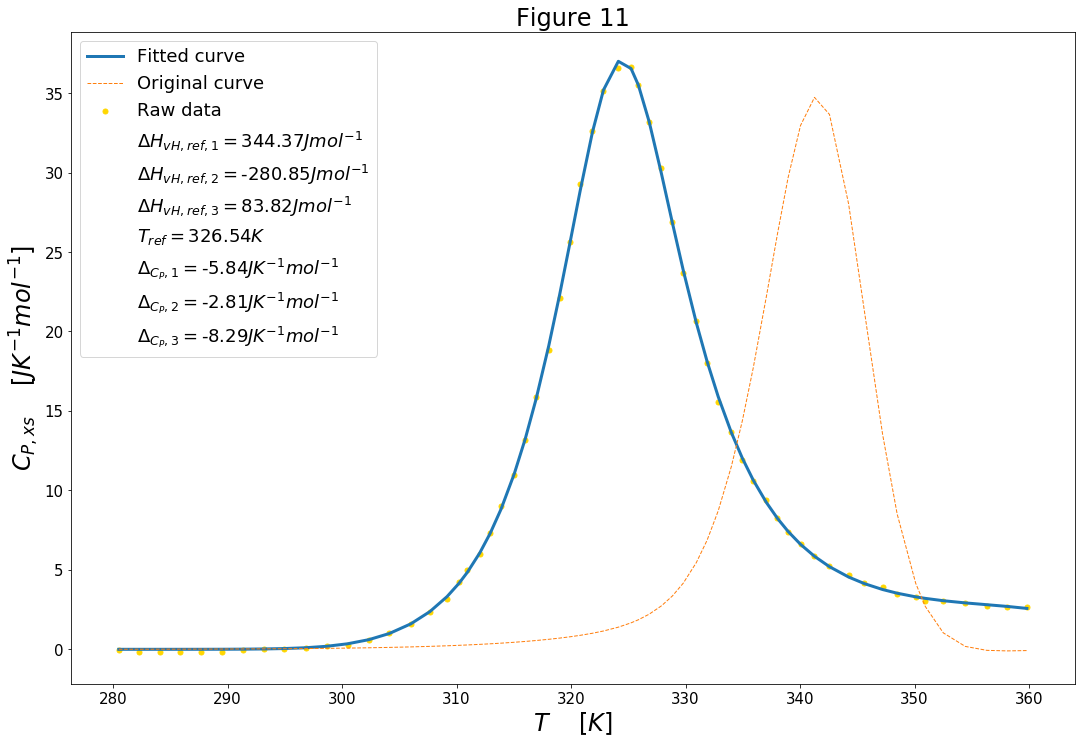

In [19]:
# PLOT FIG 1
scale = 6;
fig, ax = plt.subplots(figsize=(3*scale, 2*scale));

# Plot
plt.plot(T, C_fit, '-', linewidth=3, label='Fitted curve')
plt.scatter(T, C, s=25, color='gold', label='Raw data');

ax.set(autoscale_on=False)
plt.plot(T, C_prev, '--', linewidth=1, label='Original curve', scalex=False, scaley=False)

# Print fitting parameters as plot legends
x = T[0]
y = C[0]
plt.scatter(x, y, s=0, label=r'$\Delta H_{vH,ref,1} = $' + str(round(Delta_H_v_ref_1, 2)) + r'$J {mol}^{-1}$')
plt.scatter(x, y, s=0, label=r'$\Delta H_{vH,ref,2} = $' + str(round(Delta_H_v_ref_2, 2)) + r'$J {mol}^{-1}$')
plt.scatter(x, y, s=0, label=r'$\Delta H_{vH,ref,3} = $' + str(round(Delta_H_v_ref_3, 2)) + r'$J {mol}^{-1}$')
plt.scatter(x, y, s=0, label=r'$T_{ref} = $' + str(round(T_ref, 2)) + r'$K$')
plt.scatter(x, y, s=0, label=r'$\Delta_{C_P,1} = $' + str(round(Delta_Cp_1, 2)) + r'$J K^{-1} {mol}^{-1}$')
plt.scatter(x, y, s=0, label=r'$\Delta_{C_P,2} = $' + str(round(Delta_Cp_2, 2)) + r'$J K^{-1} {mol}^{-1}$')
plt.scatter(x, y, s=0, label=r'$\Delta_{C_P,3} = $' + str(round(Delta_Cp_3, 2)) + r'$J K^{-1} {mol}^{-1}$')

# Display plots
plt.yscale('linear');
plt.xlabel(r'$T$' + '    ' + r'$[K]$', fontsize=24);
plt.ylabel(r'$C_{P,xs}$' + '    ' + r'$[J K^{-1} mol^{-1}]$', fontsize=24);
plt.title('Figure 11', size=24);
plt.legend(prop={'size': 18});
display(plt);